# <Center>Customer Segmentation and Personality Analysis </center>
<center><b>Created By : Anand Mukharjee</b></center>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("marketing_campaign.csv")
df =pd.DataFrame(data)
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [3]:
df.describe(include="all").style.background_gradient(cmap="Blues", axis=1)

In [4]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
df.shape

(2240, 29)

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

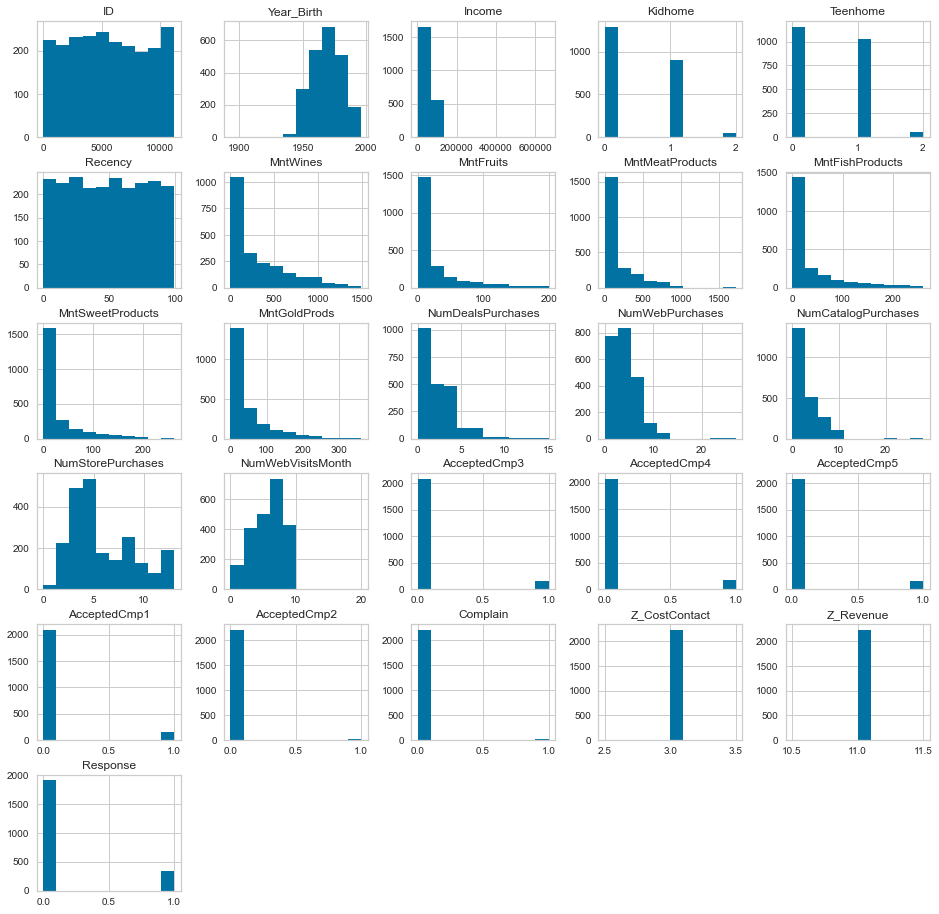

In [9]:
df.hist(figsize=(16,16))
plt.show()

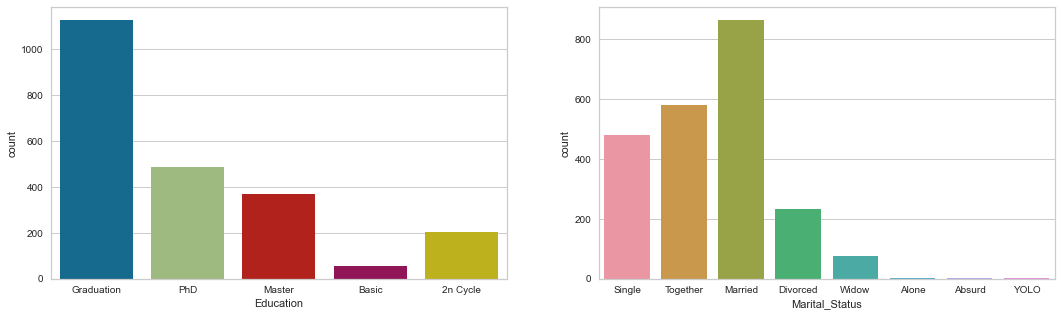

In [10]:
def plot_categorical_features(df, col_name1, col_name2): 
    """function to plot selected categorical features"""
    fig, axs = plt.subplots(ncols=2, figsize=(18,5))
    sns.countplot(x = df[col_name1], data = df, ax=axs[0])
    sns.countplot(x = df[col_name2], data = df, ax=axs[1])

plot_categorical_features(df, 'Education', 'Marital_Status')

<AxesSubplot:>

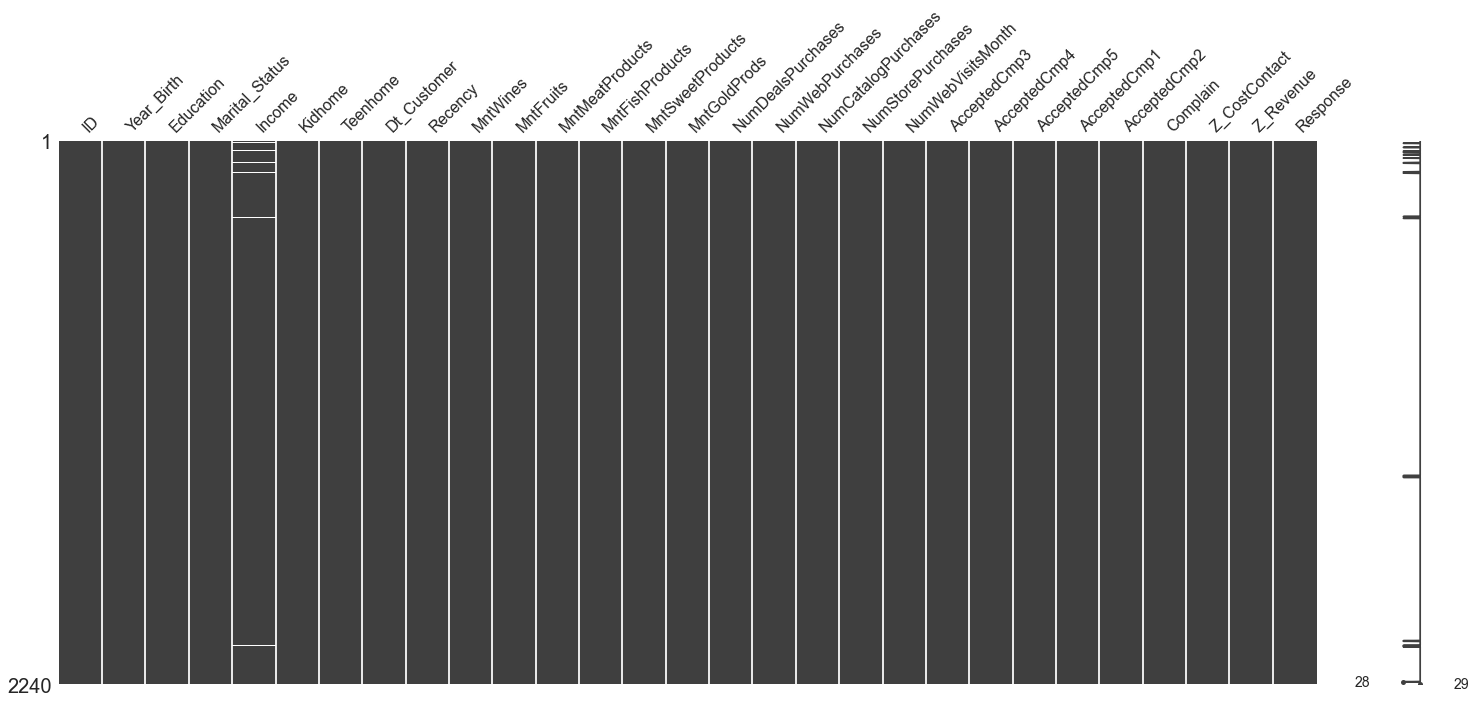

In [11]:
#Visualizing the null spaces (missing values) in the dataset.
msno.matrix(df)

# <b>We impute the missing values in column "Income" with the median of that particular column.</b>

In [12]:
df["Income"].fillna(df["Income"].median(), inplace=True)

# <b>There is no duplicate, data seems clear so far.</b>

In [13]:
df.duplicated().sum()

0

In [14]:
df["Age"] = 2022 - df["Year_Birth"]

df["Money_Spent"] = (df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"])

df["PurchaseNum"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

df["Children"] = df["Kidhome"] + df["Teenhome"]

df["Marital_Status"] = df["Marital_Status"].replace({"Married": "Together", "Alone": "Single", "Absurd": "Single", "Divorced": "Single", "Widow": "Single", "Divorced": "Single", "YOLO": "Single"})

# Drop unused columns for better insight of data.

In [15]:
df.drop(["ID", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth"], axis=1, inplace=True)

In [16]:
df.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation         Single  58138.0        0         0       58       635   
1  Graduation         Single  46344.0        1         1       38        11   
2  Graduation       Together  71613.0        0         0       26       426   
3  Graduation       Together  26646.0        1         0       26        11   
4         PhD       Together  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp4  \
0         88              546              172  ...             0   
1          1                6                2  ...             0   
2         49              127              111  ...             0   
3          4               20               10  ...             0   
4         43              118               46  ...             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0             0             0             0         0         1   65   
1             0             0             0         0         0   68   
2             0             0             0         0         0   57   
3             0             0             0         0         0   38   
4             0             0             0         0         0   41   

   Money_Spent  PurchaseNum  Children  
0         1617           22         0  
1           27            4         2  
2          776           20         0  
3           53            6         1  
4          422           14         1  

[5 rows x 28 columns]

# Visualizing the correlation between the some of the important variables using pairplot visualization.



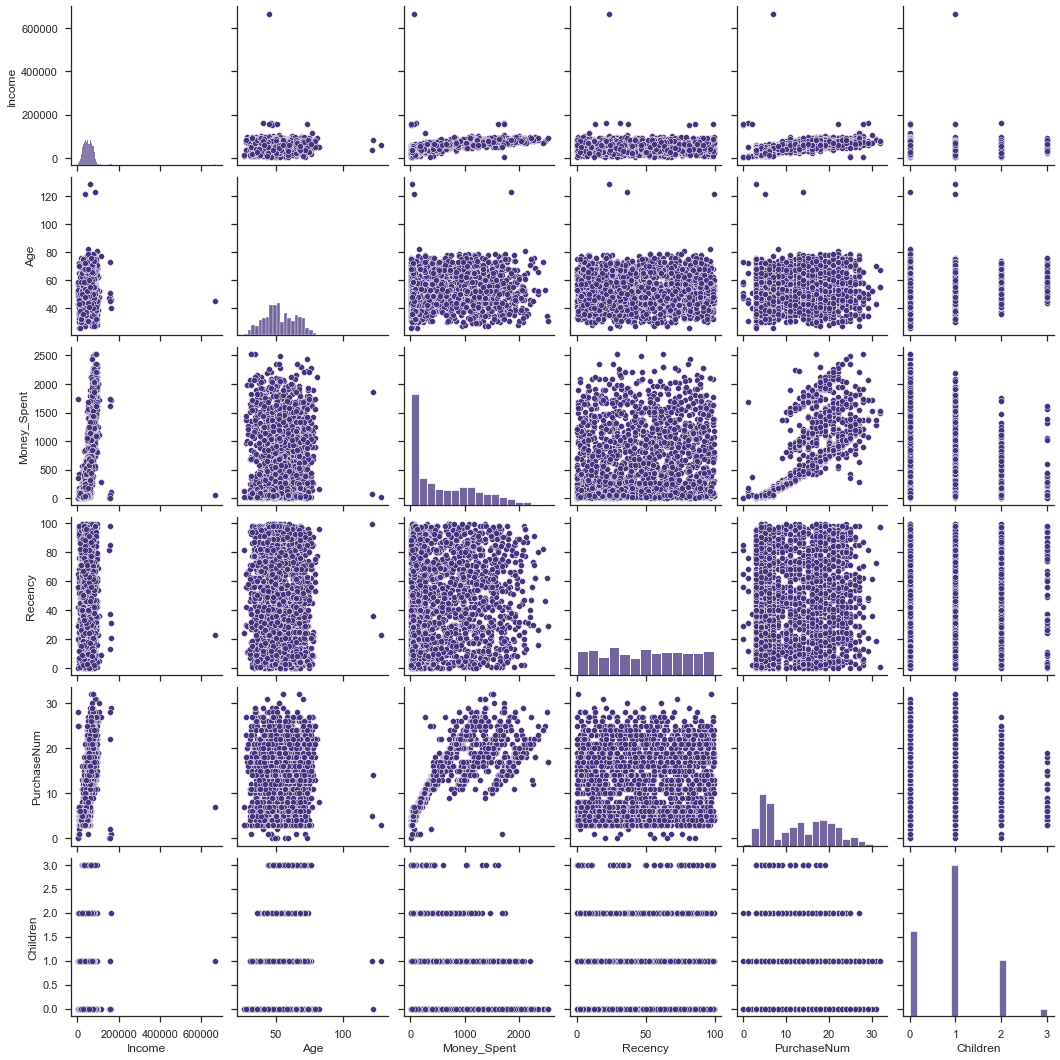

In [17]:

cols_to_plot = ["Income", "Age", "Money_Spent", "Recency", "PurchaseNum", "Children"]
sns.set_theme(style="ticks",palette="viridis")

sns.pairplot(df[cols_to_plot])

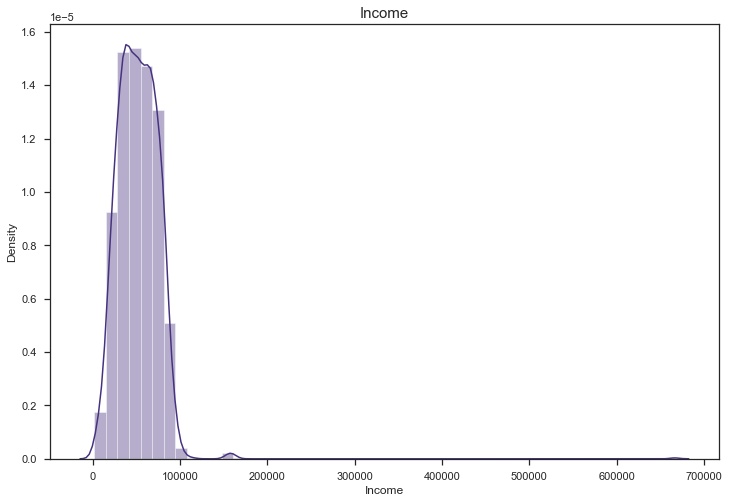

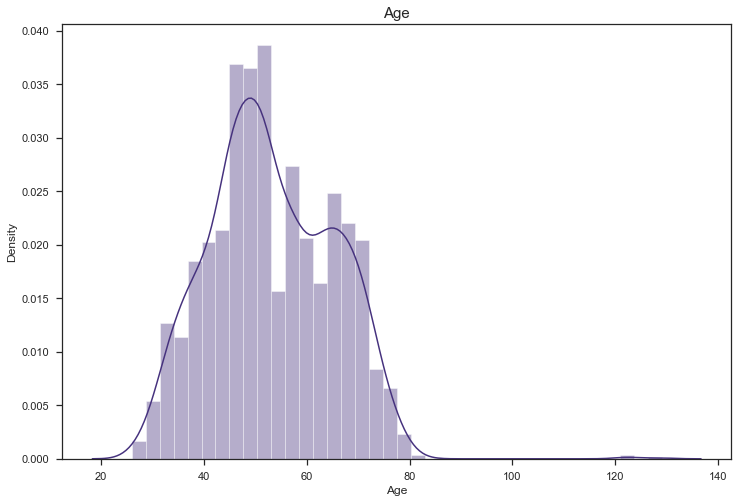

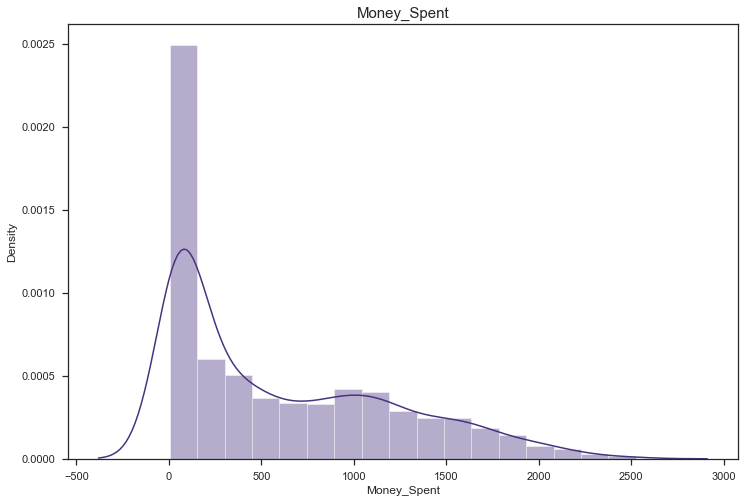

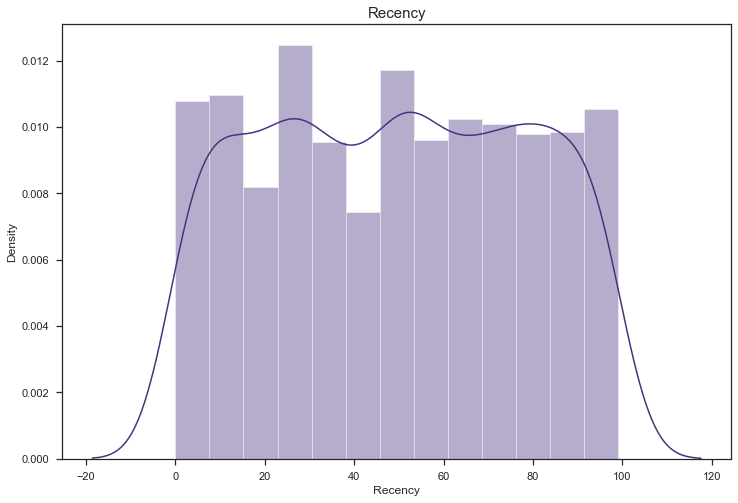

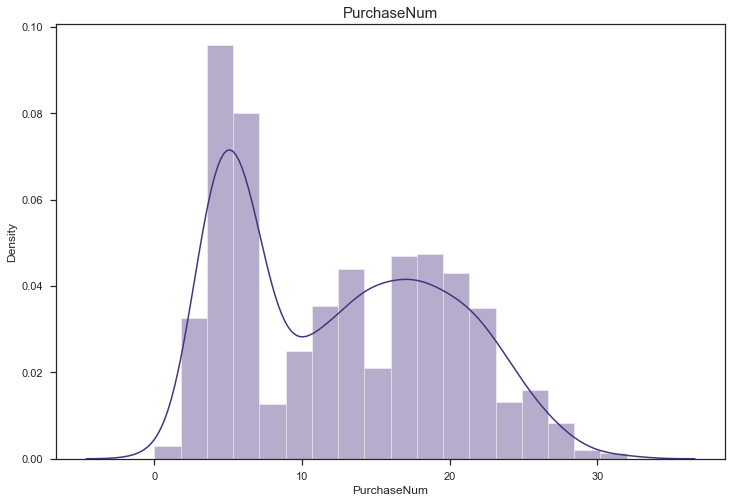

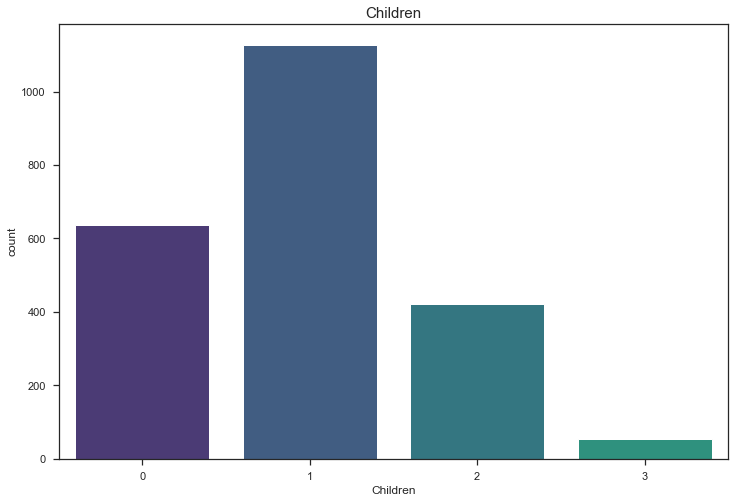

In [18]:
cols_to_plot.remove("Children")

for col in cols_to_plot:
    plt.figure(figsize=(12, 8))
    sns.distplot(df[col])
    plt.title(f"{col}", size=15)
    plt.show()


plt.figure(figsize=(12, 8))
sns.countplot(df["Children"])
plt.title("Children", size=15)
plt.show()

# Visualizing the linear correlations between variables using Heatmap Visualization. The measure used for finding the linear correlation between each variable is Pearson Correlation Coefficient.

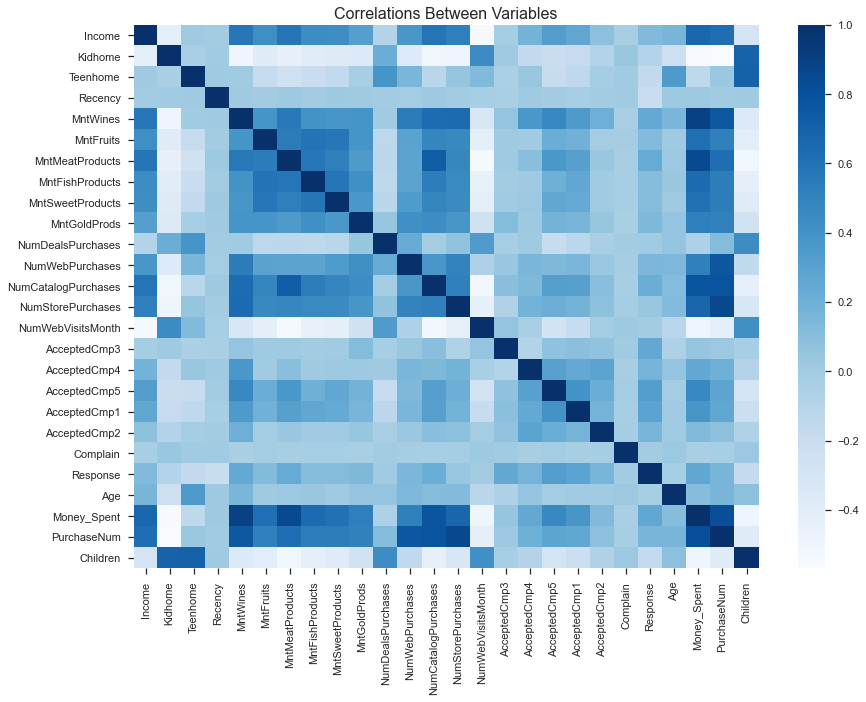

In [19]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="Blues")
plt.title("Correlations Between Variables", size=16)
plt.show()

# <center>DATA PREPROCESSING</center>

In [20]:
X = df

cat_cols = X.select_dtypes(["object"]).columns
X = pd.get_dummies(X, columns=cat_cols)

In [21]:
num_cols = ["Income", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth",  "Money_Spent",  "PurchaseNum"]

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# <center>Principal Component Analysis</center>

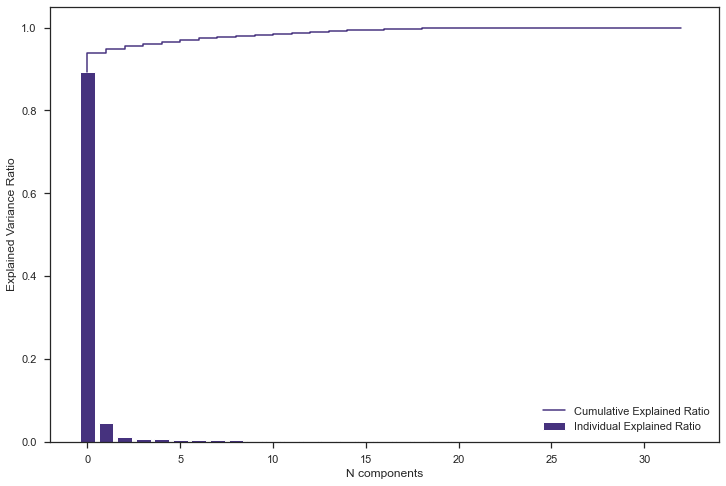

In [22]:
pca = PCA()
pca.fit(X)

cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 8))
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, label="Individual Explained Ratio")
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, label="Cumulative Explained Ratio")
plt.xlabel("N components")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc="best")
plt.show()


 It looks like first 3 components hold most of the information.

In [23]:
pca = PCA(n_components = 3)
pca.fit(X)

X_pca = pd.DataFrame(pca.transform(X), columns=["col1", "col2", "col3"])

# <center>Clustering</center>

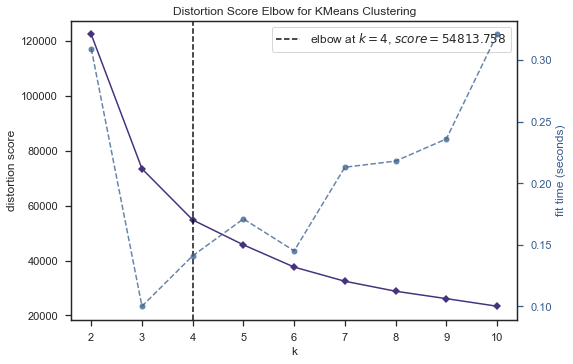

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
elbow_graph = KElbowVisualizer(KMeans(), k=10)
elbow_graph.fit(X_pca)
elbow_graph.show()

It can be easily seen that the optimal value for "n_clusters" parameter is 4. Afterwards, we get to the part of clustering.

In [25]:
kmeans = KMeans(n_clusters=4, random_state=42)
predictions = kmeans.fit_predict(X_pca)
X_pca["Clusters"] = predictions
df["Clusters"] = predictions

# Plotting the Clusters

In [26]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(X_pca, x="col1", y="col2", z="col3", color=X_pca["Clusters"], title=f"Total Explained Variance: {total_var:.2f}%")
fig.show()

# Customer Personality Analysis

In [27]:
labels = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]

cluster1_num = df[df["Clusters"]==0].shape[0]
cluster2_num = df[df["Clusters"]==1].shape[0]
cluster3_num = df[df["Clusters"]==2].shape[0]
cluster4_num = df[df["Clusters"]==3].shape[0]
values = [cluster1_num, cluster2_num, cluster3_num, cluster4_num]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.6, title="Clusters")])
fig.show()

Observations:

1:Cluster 1 makes up the huge part of data


2:Clusters that take up the least space are Cluster 4 and Cluster 2

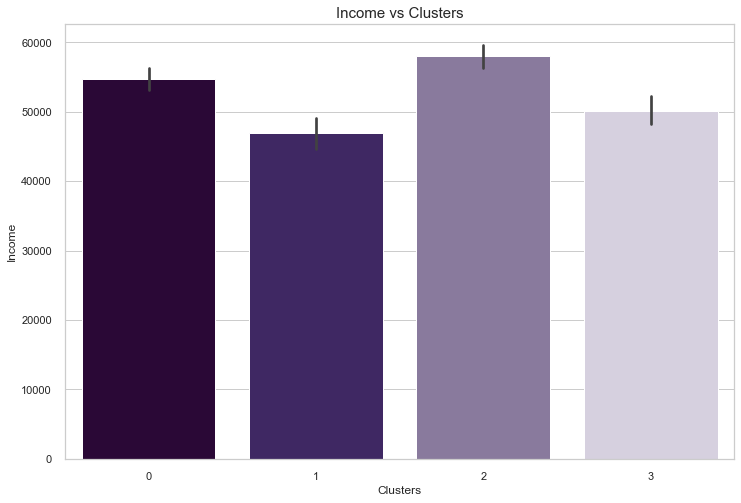

In [28]:
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]

plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["Income"], palette=pal)
plt.title("Income vs Clusters", size=15)
plt.show()

Observations:

1:The cluster which has the highest income is Cluster 1

2:Income of Cluster 3 is relatively lower than Incomes of other clusters

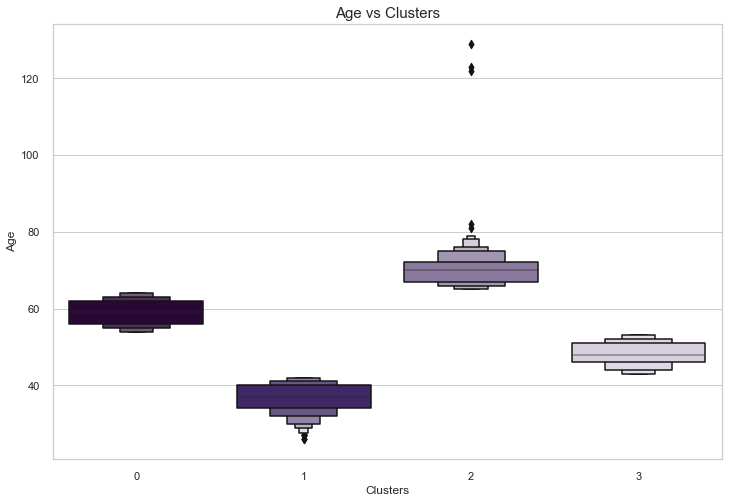

In [29]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=df["Clusters"], y=df["Age"], palette=pal)
plt.title("Age vs Clusters", size=15)
plt.show()

Observations:

1:The youngest cluster is Cluster 4 (15-42)

2:The oldest cluster is Cluster 2 (65-83)

3:Cluster 1 includes middle-aged customers (43-55)

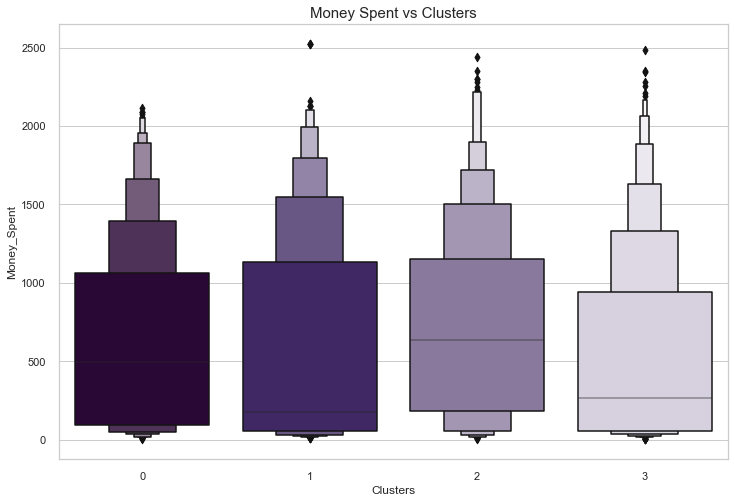

In [30]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=df["Clusters"], y=df["Money_Spent"], palette=pal)
plt.title("Money Spent vs Clusters", size=15)
plt.show()

Observations:

1:Cluster 1 is spending the least money

2:Cluster 2 is the cluster that spends the most money among other clusters

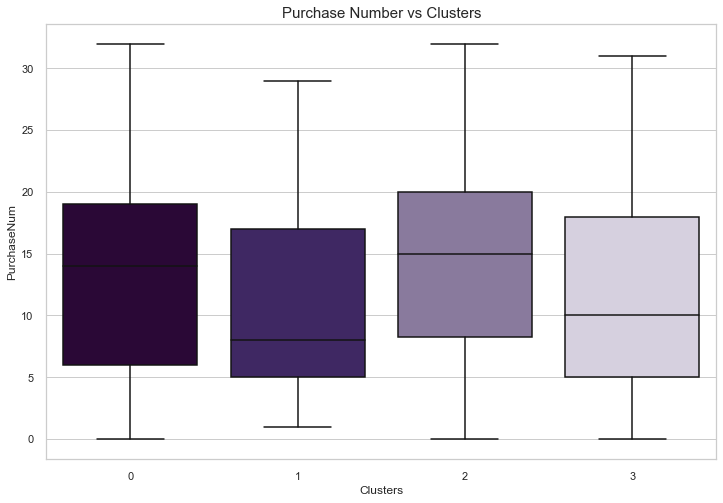

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df["Clusters"], y=df["PurchaseNum"], palette=pal)
plt.title("Purchase Number vs Clusters", size=15)
plt.show()

Observations:

1:Cluster 2 has the highest purchase number

2:Cluster 4 does the least shopping

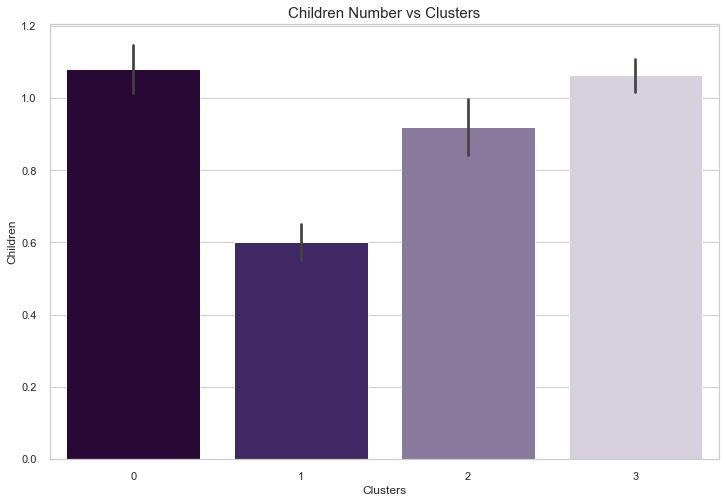

In [32]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["Children"], palette=pal)
plt.title("Children Number vs Clusters", size=15)
plt.show()

Observations:

1:Cluster 4 has either one child or no child

2:Cluster 1 has the most children among other clusters


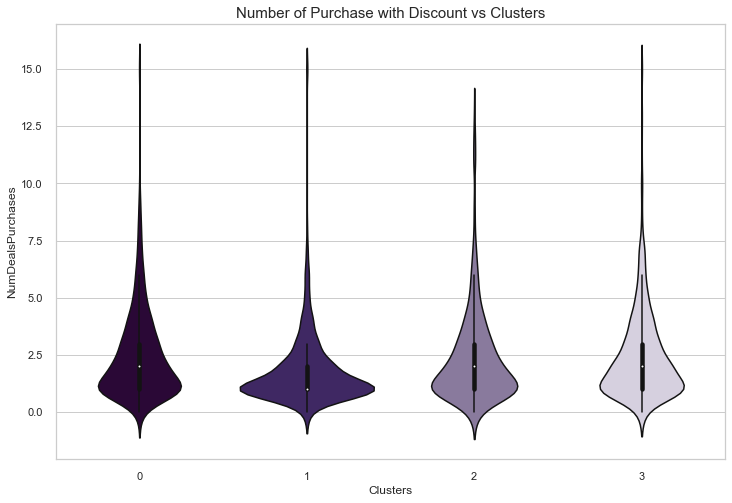

In [33]:
plt.figure(figsize=(12, 8))
sns.violinplot(x=df["Clusters"], y=df["NumDealsPurchases"], palette=pal)
plt.title("Number of Purchase with Discount vs Clusters", size=15)
plt.show()


# Conclusion
Cluster 1:

a:Spends least money

b:Has most children

c:Is the one that makes use of the discounts most

Cluster 2:

a:Has the highest income

b:Is the oldest one among other clusters

c:Spend the most money

d:Has the highest purchase number (shop-lover)

Cluster 3:

a:Is second most-earner

b:Is second most-spender

c:Has the second highest number of children

d:Has relatively higher purchase number

Cluster 4:

a:Has the least Income

b:Is the youngest cluster

c:Has the least purchase number (shop-hater)

d:Has the least number of children

e:Is the one that shops least with discount

# Marketing Suggestions
Cluster 4: makes the least money and shops least with discount. So, you should gather the information about the its location and increase the discount rates at shops located at those locations. Also, this is the youngest cluster and that's why shops situated at those locations should include the goods, clothes etc. suitable for the young people.

Cluster 1: is the second oldest cluster and people in that cluster have highest children number. It can also be observed that they spend the least money and make use of the discounts. Meaning that they have a tendency to go shopping when there is a discount. In addition to that, if you make the discounts at shops at those locations where these people with a slogan like "Make Your Child Happy", because it could remind them that they are parents, it would possibly increase the number of sales.

# Recommendations
Advertisement campaigns are usually responded to at the last stages. Those individuals with high income dont mind responding to the campaign even at first stage. Thus the campaign length can be reduced to 5 or 4, with a mention of last campaign. Another approach could be to double the deals and reduce the campaign length to 3. This increase in the number of deals could be customised to different clusters.

Individuals with high income prefer visiting stores rather than web. Product placement in store should be according to their preference, which is largely for Meats, Wines and Gold. Product placement on web should be according to individuals from middle income group

More products need to be added which cater to the needs of low and middle income groups, and the customer base of this cluster needs to be tapped.